In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values('missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [7]:
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'],inplace=True)
print("Missing values after cleaning: \n",df.isnull().sum())

Missing values after cleaning: 
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [8]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values('missing_percent',ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [11]:
print("Duplicate rows:",df.duplicated().sum())
df['class']=df['class'].astype('category')
df['embark_town']=df['embark_town'].astype('category')
df['sex']=df['sex'].astype('category')
df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    category
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


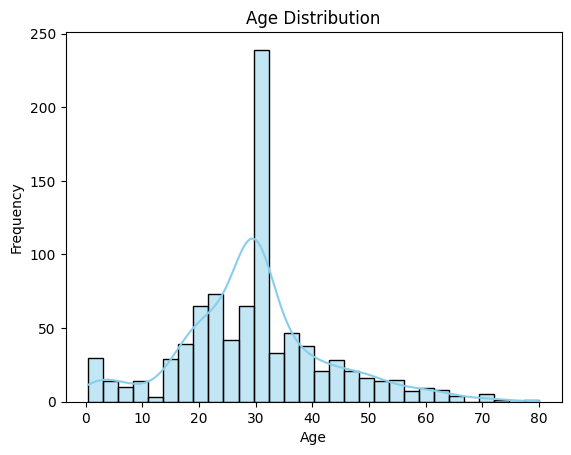

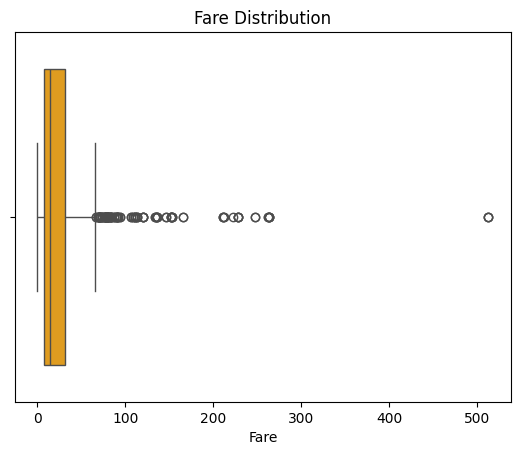

In [12]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=df['fare'],color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

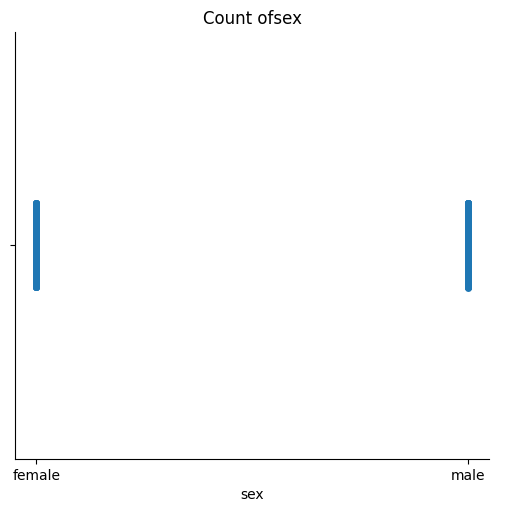

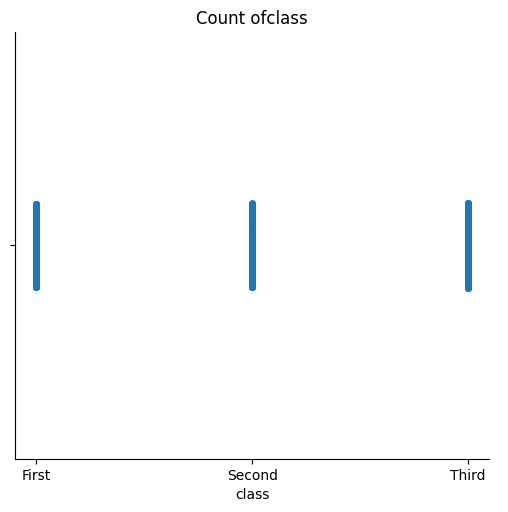

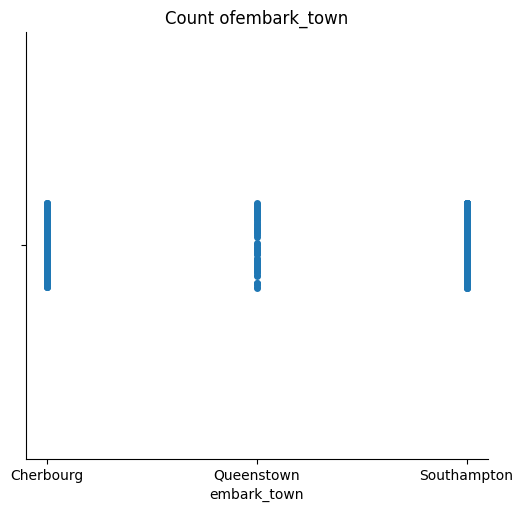

In [14]:
cat_clos=df.select_dtypes('category').columns
for col in cat_clos:
  sns.catplot(x=col,data=df)
  plt.title(f"Count of{col}")
  plt.show()

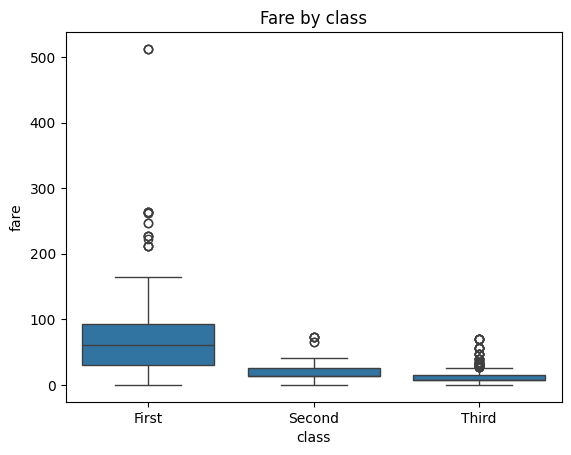

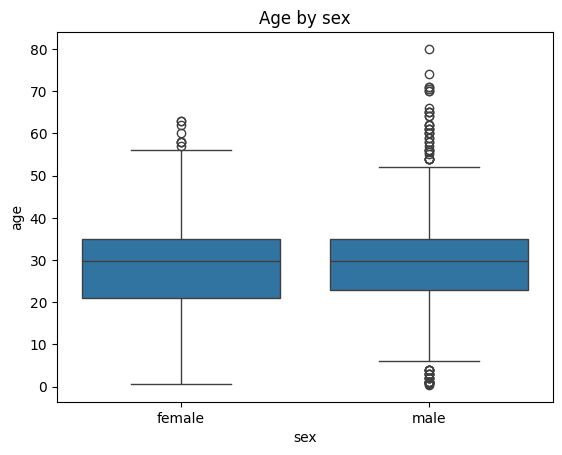

In [15]:
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()
sns.boxplot(x='sex',y='age',data=df)
plt.title("Age by sex")
plt.show()

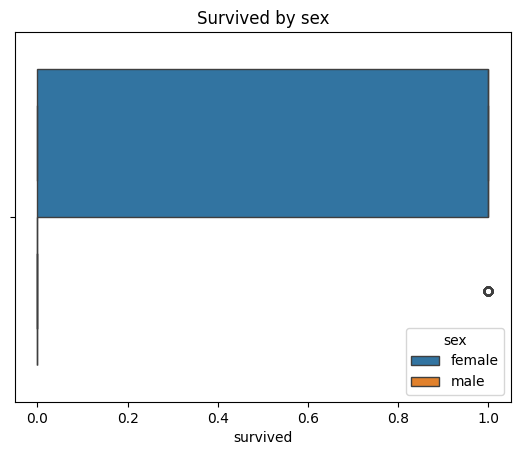

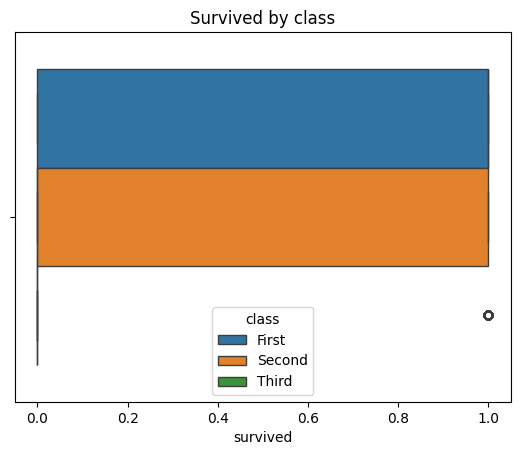

In [16]:
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Survived by sex")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survived by class")
plt.show()

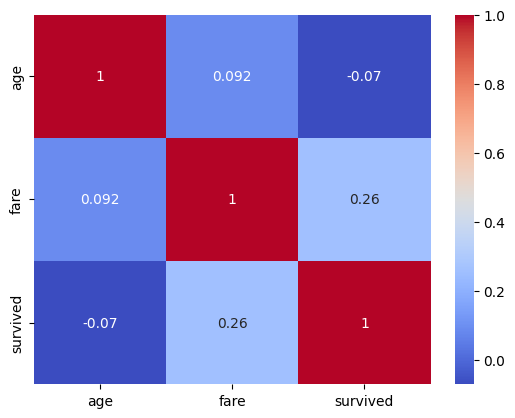

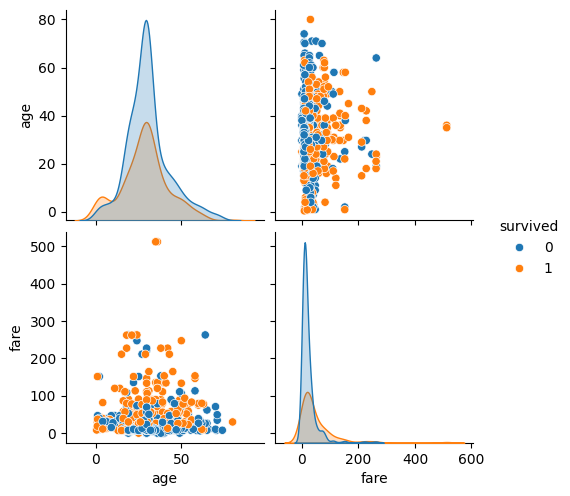

In [17]:
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Number of outliers in fare:  116


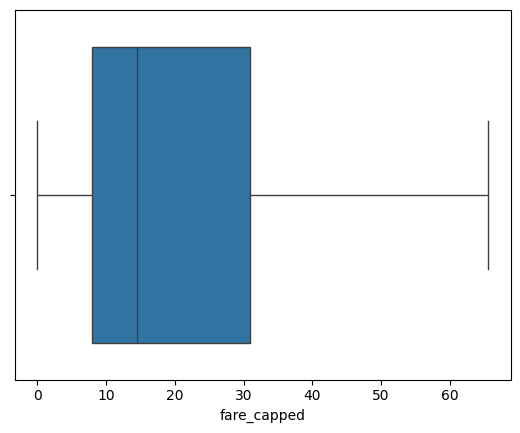

In [18]:
from numpy.strings import upper
from numpy._core.defchararray import lower
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outliers=df[(df['fare']<lower) | (df['fare']>upper)]
print("Number of outliers in fare: ",len(outliers))

df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.show()

In [19]:
# Task 1 — Data Loading, Merging & Initial Inspection
# Load all required CSV files into your notebook.
# Merge them into one dataset using Store, Dept, and Date.
# Display the first and last 10 rows.
# Print:
# .shape
# .info()
# .describe()
# Identify:
# Numerical columns
# Categorical columns
# Date columns
# List all unique store types and departments.
# 7. Identify which columns may require cleaning or type conversion


In [25]:
df2=pd.read_csv('/content/drive/MyDrive/stores.csv')
df3=pd.read_csv('/content/drive/MyDrive/features.csv')
df4=pd.read_csv('/content/drive/MyDrive/test.csv')

# Merge df4 (test data) with df2 (stores info) on 'Store'
df_merged = pd.merge(df4, df2, on='Store', how='left')

# Merge the result with df3 (features info) on 'Store' and 'Date'
# Using suffixes to handle potential duplicate column names like 'IsHoliday'
df_final_merged = pd.merge(df_merged, df3, on=['Store', 'Date'], how='left', suffixes=('_test', '_features'))

df_final_merged.head(10)

,Store,Dept,Date,IsHoliday_test,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
5,1,1,2012-12-07,False,A,151315,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573,False
6,1,1,2012-12-14,False,A,151315,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,False
7,1,1,2012-12-21,False,A,151315,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,False
8,1,1,2012-12-28,True,A,151315,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True
9,1,1,2013-01-04,False,A,151315,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False


In [26]:
df_final_merged.tail(10)

,Store,Dept,Date,IsHoliday_test,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features
115054,45,98,2013-05-24,False,B,118221,67.11,3.627,3249.34,481.82,58.48,1183.23,1309.30,NaN,NaN,False
115055,45,98,2013-05-31,False,B,118221,65.88,3.646,6474.49,411.38,77.06,9.38,4227.27,NaN,NaN,False
115056,45,98,2013-06-07,False,B,118221,70.71,3.633,9977.82,744.29,80.00,4825.71,3597.34,NaN,NaN,False
115057,45,98,2013-06-14,False,B,118221,70.01,3.632,2471.44,517.87,348.54,2612.33,3459.39,NaN,NaN,False
115058,45,98,2013-06-21,False,B,118221,70.13,3.626,4989.34,385.31,178.56,2463.42,3117.94,NaN,NaN,False
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
115063,45,98,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [27]:
df.shape

(891, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    category
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  fare_capped  891 non-null    float64 
dtypes: bool(2), category(3), float64(3), int64(4), object(3)
memory usage: 74.5+ KB


In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,fare_capped
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,24.046813
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,20.481625
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.634400


In [32]:
# List all unique store types and departments.
# 7. Identify which columns may require cleaning or type conversion
unique_store_types = df_final_merged['Type'].unique()
unique_departments = df_final_merged['Dept'].unique()
print("Unique Store Types:", unique_store_types)
print("Unique Departments:", unique_departments)

Unique Store Types: ['A' 'B' 'C']
Unique Departments: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 52 54
 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 96 97
 98 99 77 39 50 43 51 78 65]
